# Decision tree Learning

 - Decision tree learning is one of the most widely used and 
practical methods for inductive inference.
 - It is a method for approximating discrete-valued functions, 
in which the learned function is represented by a decision 
tree.
 -  It is robust to noisy data and capable of learning disjunctive 
expressions.
 - Learned trees can also be re-represented as sets of if-then 
rules to improve human readability.
 -  Decision tree algorithms transform raw data to rule based 
decision making trees

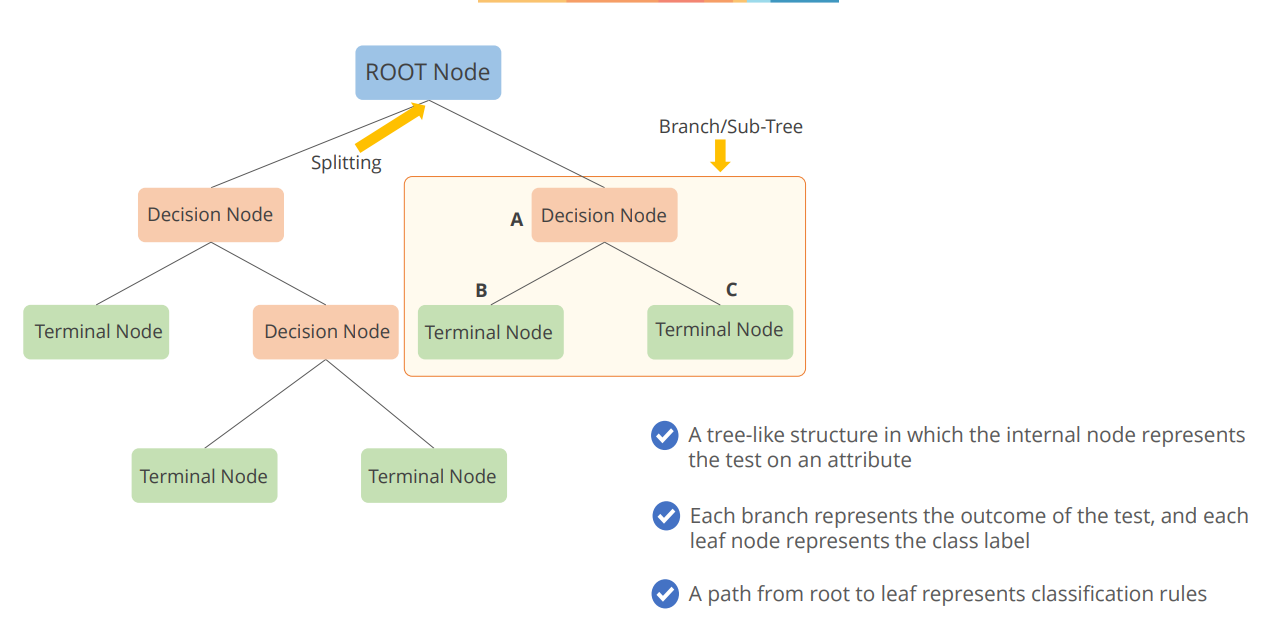